In [1]:
from pydub import AudioSegment

white_noise = AudioSegment.from_wav("437287__senorstudy__statosphere-silence-ambiance-air-tone-buzz-noise.wav")
rooster = AudioSegment.from_wav("384188__inspectorj__rooster-crowing-a.wav")
church = AudioSegment.from_wav("578544__nomiqbomi__church-bell-2.wav")

mixed_audio = white_noise
for _ in range(5):
    mixed_audio += rooster
    mixed_audio += white_noise
    mixed_audio += church
    mixed_audio += white_noise

mixed_audio.export("00_demo-recording.wav", format="wav")
print("Created demo file '00_demo-recording.wav'")


C:\Users\Theissen-Lipp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Created demo file '00_demo-recording.wav'


In [2]:
import json
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

audio = AudioSegment.from_wav("00_demo-recording.wav")
events = detect_nonsilent(audio, min_silence_len=5000, silence_thresh=-30, seek_step=50)

for start, end in events:
    print(f"Start: {start} ms, End: {end} ms")

with open("01_events.json", "w") as f:
    json.dump(events, f, indent=4)


Start: 60250 ms, End: 61850 ms
Start: 122700 ms, End: 123750 ms
Start: 186600 ms, End: 188200 ms
Start: 249050 ms, End: 250150 ms
Start: 313000 ms, End: 314600 ms
Start: 375400 ms, End: 376500 ms
Start: 439350 ms, End: 440950 ms
Start: 501800 ms, End: 502850 ms
Start: 565700 ms, End: 567350 ms
Start: 628150 ms, End: 629250 ms


Event 1: Start=60250ms, End=61850ms, Category=1
Event 2: Start=122700ms, End=123750ms, Category=0
Event 3: Start=186600ms, End=188200ms, Category=1
Event 4: Start=249050ms, End=250150ms, Category=0
Event 5: Start=313000ms, End=314600ms, Category=1
Event 6: Start=375400ms, End=376500ms, Category=0
Event 7: Start=439350ms, End=440950ms, Category=1
Event 8: Start=501800ms, End=502850ms, Category=0
Event 9: Start=565700ms, End=567350ms, Category=1
Event 10: Start=628150ms, End=629250ms, Category=0


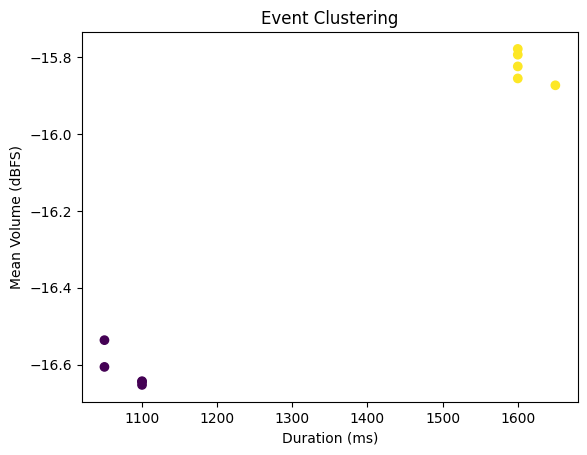

In [3]:
import json

import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
from sklearn.cluster import KMeans

with open("01_events.json", "r") as f:
    events = json.load(f)

# Calculate features
feature_set = []
audio = AudioSegment.from_wav("00_demo-recording.wav")
for start, end in events:
    segment = audio[start:end]
    # Use duration and mean volume as features for the demo
    duration = end - start
    mean_volume = segment.dBFS
    feature_set.append([duration, mean_volume])
features = np.array(feature_set)

# Clustering (k-means 2)
kmeans = KMeans(n_clusters=2).fit(features)

# Print categories
categories = kmeans.labels_
for i, (start, end) in enumerate(events):
    print(f"Event {i + 1}: Start={start}ms, End={end}ms, Category={categories[i]}")

# Visualize the results
plt.scatter(features[:, 0], features[:, 1], c=categories, cmap='viridis', marker='o')
plt.xlabel('Duration (ms)')
plt.ylabel('Mean Volume (dBFS)')
plt.title('Event Clustering')
plt.show()

# Add the detected class to each event
classified_events = []
for i, (start, end) in enumerate(events):
    classified_events.append([int(start), int(end), int(categories[i])])

# Export as JSON
with open("02_classified_events.json", "w") as f:
    json.dump(classified_events, f, indent=4)


In [4]:
import json

# Load the manual classification
with open("03_manual-labels.json", "r") as f:
    label_map = json.load(f)

# Load the classified events
with open("02_classified_events.json", "r") as f:
    classified_events = json.load(f)

# Filter events for rooster crow
rooster_events = [
    [event[0], event[1]]  # Skip the detected class 1
    for event in classified_events if label_map[str(event[2])] == label_map["1"]
]

# Step 4: Export the filtered rooster events into "04_rooster-crows.json"
with open("04_rooster-crows.json", "w") as f:
    json.dump(rooster_events, f, indent=4)


In [5]:
import json

import pygame
from pydub import AudioSegment

pygame.mixer.init()

# Load rooster crow events
with open("04_rooster-crows.json", "r") as f:
    rooster_events = json.load(f)

# Load recording
recording = AudioSegment.from_wav("00_demo-recording.wav")

# Store each snippet as WAV file
for idx, event in enumerate(rooster_events, 1):  # Start numbering from 1
    start_ms, end_ms = event[0], event[1]

    # Extract the snippet (from start to end)
    snippet = recording[start_ms:end_ms]

    # Generate the output filename
    output_filename = f"05_snippet-{idx:02d}.wav"

    # Export the snippet to the output file
    snippet.export(output_filename, format="wav")

    print(f"Snippet {idx} saved as {output_filename}")


pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Snippet 1 saved as 05_snippet-01.wav
Snippet 2 saved as 05_snippet-02.wav
Snippet 3 saved as 05_snippet-03.wav
Snippet 4 saved as 05_snippet-04.wav
Snippet 5 saved as 05_snippet-05.wav


In [6]:
import os

import pygame

pygame.mixer.init()

snippet_files = [f for f in os.listdir("./") if f.startswith("05_snippet") and f.endswith(".wav")]
snippet_files.sort()

for idx, snippet_file in enumerate(snippet_files, 1):
    input(f"Press Enter to play rooster crow: {snippet_file}")
    pygame.mixer.music.load(snippet_file)
    pygame.mixer.music.play()

    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)


Press Enter to play rooster crow: 05_snippet-01.wav 
Press Enter to play rooster crow: 05_snippet-02.wav 
Press Enter to play rooster crow: 05_snippet-03.wav 
Press Enter to play rooster crow: 05_snippet-04.wav 
Press Enter to play rooster crow: 05_snippet-05.wav 
